In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
# Prepare dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=0.1307,std=0.3081)])

train_set = torchvision.datasets.MNIST(root = "./dataset",train=True,download=False,transform=transform)  #Make download == True to download dataset
test_set = torchvision.datasets.MNIST(root ="./dataset",train=False,download=False,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True,num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=32,shuffle=True,num_workers=4)

In [4]:
data__ = enumerate(train_loader)
batch_id , (images,labels) = next(data__)

In [5]:
images.shape

torch.Size([32, 1, 28, 28])

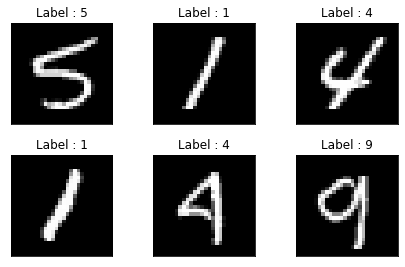

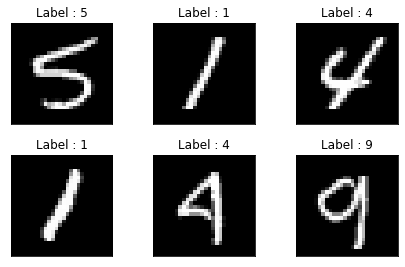

In [6]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label : {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
# Building neural net
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)

        # Apply the fully connected layer and return the result
        return self.fc2(x)

# To calculate output size use formula (W - K + 2P/S) + 1
# image dimension is 28 * 28 * 1
# W = 28 , K = 3 , P = 1 , S = 1
# after con1 , output size is 28*28*5
# after first maxpool, output size is 14*14*5
# after conv2, output size is 14*14*10
# after second maxpool , output size is 7*7*10

# NOTE : For maxpool use same formula, just replace kernel with maxpool size

In [8]:
# Training nn

model = Net()
model.to(device) # transfer to GPU if available
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)
calculate_loss = nn.CrossEntropyLoss()

num_epochs = 1000

since = time.time()

gradien_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    #scheduler.step()
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0



    # Training Code start 
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()  # Clear the old gradients from last step  
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   #forward
        output.to(device)
        loss = calculate_loss(output,labels) #calculate loss
        loss.backward()
        optimizer.step()

        # Training code ends



        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    #Gradients
    g_2 = []
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            #print (name, param.grad.data)
            g_2.append(torch.flatten(param.grad.data))
    print(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)))
    gradien_vector.append(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)).item())

    
    # #weights
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print (name, param.data)
    

time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        


Epoch 0/999
----------



tensor(0.9865, device='cuda:0')
Epoch 1/999
----------



tensor(1.8294, device='cuda:0')
Epoch 2/999
----------



tensor(0.6268, device='cuda:0')
Epoch 3/999
----------



tensor(1.7454, device='cuda:0')
Epoch 4/999
----------



tensor(0.8800, device='cuda:0')
Epoch 5/999
----------



tensor(2.5916, device='cuda:0')
Epoch 6/999
----------



tensor(2.8830, device='cuda:0')
Epoch 7/999
----------



tensor(2.4413, device='cuda:0')
Epoch 8/999
----------



tensor(0.6167, device='cuda:0')
Epoch 9/999
----------



tensor(1.8513, device='cuda:0')
Epoch 10/999
----------



tensor(1.1934, device='cuda:0')
Epoch 11/999
----------



tensor(0.1363, device='cuda:0')
Epoch 12/999
----------



tensor(0.0472, device='cuda:0')
Epoch 13/999
----------



tensor(2.1302, device='cuda:0')
Epoch 14/999
----------



tensor(0.6316, device='cuda:0')
Epoch 15/999
----------



tensor(0.0814, device='cuda:0')
Epoch 16/999
----------



tensor(0.3071, device='cuda:0')
Epoch 17/999
----------



tensor(0.0975, device='cuda:0')
Epoch 18/999
----------



tensor(0.0221, device='cuda:0')
Epoch 19/999
----------



tensor(1.0197, device='cuda:0')
Epoch 20/999
----------



tensor(0.0986, device='cuda:0')
Epoch 21/999
----------



tensor(0.5511, device='cuda:0')
Epoch 22/999
----------



tensor(0.0788, device='cuda:0')
Epoch 23/999
----------



tensor(3.6001, device='cuda:0')
Epoch 24/999
----------



tensor(3.9860, device='cuda:0')
Epoch 25/999
----------



tensor(0.4910, device='cuda:0')
Epoch 26/999
----------



tensor(1.2691, device='cuda:0')
Epoch 27/999
----------



tensor(0.0043, device='cuda:0')
Epoch 28/999
----------



tensor(0.0248, device='cuda:0')
Epoch 29/999
----------



tensor(3.2592, device='cuda:0')
Epoch 30/999
----------



tensor(2.0948, device='cuda:0')
Epoch 31/999
----------



tensor(2.7515, device='cuda:0')
Epoch 32/999
----------



tensor(1.5898, device='cuda:0')
Epoch 33/999
----------



tensor(0.0642, device='cuda:0')
Epoch 34/999
----------



tensor(1.0764, device='cuda:0')
Epoch 35/999
----------



tensor(2.4347, device='cuda:0')
Epoch 36/999
----------



tensor(1.5635, device='cuda:0')
Epoch 37/999
----------



tensor(1.2272, device='cuda:0')
Epoch 38/999
----------



tensor(0.1161, device='cuda:0')
Epoch 39/999
----------



tensor(0.9278, device='cuda:0')
Epoch 40/999
----------



tensor(0.1624, device='cuda:0')
Epoch 41/999
----------



tensor(0.3865, device='cuda:0')
Epoch 42/999
----------



tensor(0.0225, device='cuda:0')
Epoch 43/999
----------



tensor(5.0813, device='cuda:0')
Epoch 44/999
----------



tensor(0.0232, device='cuda:0')
Epoch 45/999
----------



tensor(0.5761, device='cuda:0')
Epoch 46/999
----------



tensor(1.3064, device='cuda:0')
Epoch 47/999
----------



tensor(0.0046, device='cuda:0')
Epoch 48/999
----------



tensor(0.9840, device='cuda:0')
Epoch 49/999
----------



tensor(2.5800, device='cuda:0')
Epoch 50/999
----------



tensor(0.3501, device='cuda:0')
Epoch 51/999
----------



tensor(0.0041, device='cuda:0')
Epoch 52/999
----------



tensor(0.0159, device='cuda:0')
Epoch 53/999
----------



tensor(0.0225, device='cuda:0')
Epoch 54/999
----------



tensor(0.3139, device='cuda:0')
Epoch 55/999
----------



tensor(4.6773, device='cuda:0')
Epoch 56/999
----------



tensor(0.0015, device='cuda:0')
Epoch 57/999
----------



tensor(4.0684, device='cuda:0')
Epoch 58/999
----------



tensor(0.0162, device='cuda:0')
Epoch 59/999
----------



tensor(0.0482, device='cuda:0')
Epoch 60/999
----------



tensor(0.0134, device='cuda:0')
Epoch 61/999
----------



tensor(1.2557, device='cuda:0')
Epoch 62/999
----------



tensor(0.3084, device='cuda:0')
Epoch 63/999
----------



tensor(0.0263, device='cuda:0')
Epoch 64/999
----------



tensor(0.2713, device='cuda:0')
Epoch 65/999
----------



tensor(0.0042, device='cuda:0')
Epoch 66/999
----------



tensor(7.2341, device='cuda:0')
Epoch 67/999
----------



tensor(0.0232, device='cuda:0')
Epoch 68/999
----------



tensor(0.4851, device='cuda:0')
Epoch 69/999
----------



tensor(1.7337, device='cuda:0')
Epoch 70/999
----------



tensor(0.1173, device='cuda:0')
Epoch 71/999
----------



tensor(0.0124, device='cuda:0')
Epoch 72/999
----------



tensor(0.0018, device='cuda:0')
Epoch 73/999
----------



tensor(0.0008, device='cuda:0')
Epoch 74/999
----------



tensor(0.0046, device='cuda:0')
Epoch 75/999
----------



tensor(0.1015, device='cuda:0')
Epoch 76/999
----------



tensor(0.0415, device='cuda:0')
Epoch 77/999
----------



tensor(0.0842, device='cuda:0')
Epoch 78/999
----------



tensor(0.8254, device='cuda:0')
Epoch 79/999
----------



tensor(0.0001, device='cuda:0')
Epoch 80/999
----------



tensor(0.0220, device='cuda:0')
Epoch 81/999
----------



tensor(0.0196, device='cuda:0')
Epoch 82/999
----------



tensor(0.0013, device='cuda:0')
Epoch 83/999
----------



tensor(0.0183, device='cuda:0')
Epoch 84/999
----------



tensor(0.0014, device='cuda:0')
Epoch 85/999
----------



tensor(0.8775, device='cuda:0')
Epoch 86/999
----------



tensor(9.6856, device='cuda:0')
Epoch 87/999
----------



tensor(0.0033, device='cuda:0')
Epoch 88/999
----------



tensor(0.1096, device='cuda:0')
Epoch 89/999
----------



tensor(2.3608, device='cuda:0')
Epoch 90/999
----------



tensor(3.6994, device='cuda:0')
Epoch 91/999
----------



tensor(0.1968, device='cuda:0')
Epoch 92/999
----------



tensor(2.2263, device='cuda:0')
Epoch 93/999
----------



tensor(0.0001, device='cuda:0')
Epoch 94/999
----------



tensor(0.2508, device='cuda:0')
Epoch 95/999
----------



tensor(0.0042, device='cuda:0')
Epoch 96/999
----------



tensor(1.2072, device='cuda:0')
Epoch 97/999
----------



tensor(1.2774e-05, device='cuda:0')
Epoch 98/999
----------



tensor(0.0276, device='cuda:0')
Epoch 99/999
----------



tensor(0.0011, device='cuda:0')
Epoch 100/999
----------



tensor(0.0042, device='cuda:0')
Epoch 101/999
----------



tensor(1.1501, device='cuda:0')
Epoch 102/999
----------



tensor(2.0246e-05, device='cuda:0')
Epoch 103/999
----------



tensor(5.4108, device='cuda:0')
Epoch 104/999
----------



tensor(0.0350, device='cuda:0')
Epoch 105/999
----------



tensor(0.0021, device='cuda:0')
Epoch 106/999
----------



tensor(0.0027, device='cuda:0')
Epoch 107/999
----------



tensor(0.0005, device='cuda:0')
Epoch 108/999
----------



tensor(0.0097, device='cuda:0')
Epoch 109/999
----------



tensor(0.0349, device='cuda:0')
Epoch 110/999
----------



tensor(0.0038, device='cuda:0')
Epoch 111/999
----------



tensor(2.6096, device='cuda:0')
Epoch 112/999
----------



tensor(0.3393, device='cuda:0')
Epoch 113/999
----------



tensor(0.0191, device='cuda:0')
Epoch 114/999
----------



tensor(0.1623, device='cuda:0')
Epoch 115/999
----------



tensor(7.7523, device='cuda:0')
Epoch 116/999
----------



tensor(3.6982, device='cuda:0')
Epoch 117/999
----------



tensor(0.0078, device='cuda:0')
Epoch 118/999
----------



tensor(0.0021, device='cuda:0')
Epoch 119/999
----------



tensor(0.4165, device='cuda:0')
Epoch 120/999
----------



tensor(0.0329, device='cuda:0')
Epoch 121/999
----------



tensor(0.0036, device='cuda:0')
Epoch 122/999
----------



tensor(0.0182, device='cuda:0')
Epoch 123/999
----------



tensor(0.0023, device='cuda:0')
Epoch 124/999
----------



tensor(0.0060, device='cuda:0')
Epoch 125/999
----------



tensor(0.0013, device='cuda:0')
Epoch 126/999
----------



tensor(0.0312, device='cuda:0')
Epoch 127/999
----------



tensor(0.4940, device='cuda:0')
Epoch 128/999
----------



tensor(1.9994e-05, device='cuda:0')
Epoch 129/999
----------



tensor(1.8188, device='cuda:0')
Epoch 130/999
----------



tensor(0.0055, device='cuda:0')
Epoch 131/999
----------



tensor(0.0088, device='cuda:0')
Epoch 132/999
----------



tensor(1.0378e-05, device='cuda:0')
Epoch 133/999
----------



tensor(0.0147, device='cuda:0')
Epoch 134/999
----------



tensor(0.2049, device='cuda:0')
Epoch 135/999
----------



tensor(0.2542, device='cuda:0')
Epoch 136/999
----------



tensor(0.3127, device='cuda:0')
Epoch 137/999
----------



tensor(0.1011, device='cuda:0')
Epoch 138/999
----------



tensor(0.0802, device='cuda:0')
Epoch 139/999
----------



tensor(7.3263e-06, device='cuda:0')
Epoch 140/999
----------



tensor(4.0446, device='cuda:0')
Epoch 141/999
----------



tensor(0.0621, device='cuda:0')
Epoch 142/999
----------



tensor(0.0071, device='cuda:0')
Epoch 143/999
----------



tensor(0.0408, device='cuda:0')
Epoch 144/999
----------



tensor(0.0883, device='cuda:0')
Epoch 145/999
----------



tensor(0.0342, device='cuda:0')
Epoch 146/999
----------



tensor(0.0223, device='cuda:0')
Epoch 147/999
----------



tensor(0.1441, device='cuda:0')
Epoch 148/999
----------



tensor(0.0028, device='cuda:0')
Epoch 149/999
----------



tensor(2.4230e-06, device='cuda:0')
Epoch 150/999
----------



tensor(0.0001, device='cuda:0')
Epoch 151/999
----------



tensor(0.0002, device='cuda:0')
Epoch 152/999
----------



tensor(0.0809, device='cuda:0')
Epoch 153/999
----------



tensor(0.0068, device='cuda:0')
Epoch 154/999
----------



tensor(0.5572, device='cuda:0')
Epoch 155/999
----------



tensor(0.0006, device='cuda:0')
Epoch 156/999
----------



tensor(6.8505, device='cuda:0')
Epoch 157/999
----------



tensor(0.3041, device='cuda:0')
Epoch 158/999
----------



tensor(0.6324, device='cuda:0')
Epoch 159/999
----------



tensor(0.0203, device='cuda:0')
Epoch 160/999
----------



tensor(0.0181, device='cuda:0')
Epoch 161/999
----------



tensor(0.0003, device='cuda:0')
Epoch 162/999
----------



tensor(9.1300e-08, device='cuda:0')
Epoch 163/999
----------



tensor(0.4188, device='cuda:0')
Epoch 164/999
----------



tensor(7.6898, device='cuda:0')
Epoch 165/999
----------



tensor(0.0013, device='cuda:0')
Epoch 166/999
----------



tensor(0.5112, device='cuda:0')
Epoch 167/999
----------



tensor(4.7841, device='cuda:0')
Epoch 168/999
----------



tensor(0.2817, device='cuda:0')
Epoch 169/999
----------



tensor(5.6149e-05, device='cuda:0')
Epoch 170/999
----------



tensor(9.1928, device='cuda:0')
Epoch 171/999
----------



tensor(0.8059, device='cuda:0')
Epoch 172/999
----------



tensor(9.3891e-05, device='cuda:0')
Epoch 173/999
----------



tensor(8.1089e-08, device='cuda:0')
Epoch 174/999
----------



tensor(0.0401, device='cuda:0')
Epoch 175/999
----------



tensor(0.0283, device='cuda:0')
Epoch 176/999
----------



tensor(5.0387e-05, device='cuda:0')
Epoch 177/999
----------



tensor(0.1225, device='cuda:0')
Epoch 178/999
----------



tensor(0.0002, device='cuda:0')
Epoch 179/999
----------



tensor(0.2329, device='cuda:0')
Epoch 180/999
----------



tensor(0.1846, device='cuda:0')
Epoch 181/999
----------



tensor(3.0316e-05, device='cuda:0')
Epoch 182/999
----------



tensor(0.0003, device='cuda:0')
Epoch 183/999
----------



tensor(0.0043, device='cuda:0')
Epoch 184/999
----------



tensor(0.0045, device='cuda:0')
Epoch 185/999
----------



tensor(0.0331, device='cuda:0')
Epoch 186/999
----------



tensor(0.0060, device='cuda:0')
Epoch 187/999
----------



tensor(8.9666e-05, device='cuda:0')
Epoch 188/999
----------



tensor(0.0002, device='cuda:0')
Epoch 189/999
----------



tensor(0.0014, device='cuda:0')
Epoch 190/999
----------



tensor(2.0814e-10, device='cuda:0')
Epoch 191/999
----------



tensor(0.0113, device='cuda:0')
Epoch 192/999
----------



tensor(0.0089, device='cuda:0')
Epoch 193/999
----------



tensor(0.0006, device='cuda:0')
Epoch 194/999
----------



tensor(3.8599e-06, device='cuda:0')
Epoch 195/999
----------



tensor(0.4328, device='cuda:0')
Epoch 196/999
----------



tensor(0.0295, device='cuda:0')
Epoch 197/999
----------



tensor(0.4276, device='cuda:0')
Epoch 198/999
----------



tensor(8.0019e-09, device='cuda:0')
Epoch 199/999
----------



tensor(1.9291, device='cuda:0')
Epoch 200/999
----------



tensor(0.8858, device='cuda:0')
Epoch 201/999
----------



tensor(0.0006, device='cuda:0')
Epoch 202/999
----------



tensor(0.5620, device='cuda:0')
Epoch 203/999
----------



tensor(7.2444e-07, device='cuda:0')
Epoch 204/999
----------



tensor(0.0061, device='cuda:0')
Epoch 205/999
----------



tensor(0.0005, device='cuda:0')
Epoch 206/999
----------



tensor(0.1262, device='cuda:0')
Epoch 207/999
----------



tensor(2.5019e-08, device='cuda:0')
Epoch 208/999
----------



tensor(0.0621, device='cuda:0')
Epoch 209/999
----------



tensor(2.1637e-06, device='cuda:0')
Epoch 210/999
----------



tensor(0.0001, device='cuda:0')
Epoch 211/999
----------



tensor(0.0119, device='cuda:0')
Epoch 212/999
----------



tensor(1.2220e-06, device='cuda:0')
Epoch 213/999
----------



tensor(9.4893e-09, device='cuda:0')
Epoch 214/999
----------



tensor(0.0009, device='cuda:0')
Epoch 215/999
----------



tensor(0.0002, device='cuda:0')
Epoch 216/999
----------



tensor(2.8847e-07, device='cuda:0')
Epoch 217/999
----------



tensor(1.6484e-06, device='cuda:0')
Epoch 218/999
----------



tensor(0.0160, device='cuda:0')
Epoch 219/999
----------



tensor(6.7565e-07, device='cuda:0')
Epoch 220/999
----------



tensor(0.0002, device='cuda:0')
Epoch 221/999
----------



tensor(0.0020, device='cuda:0')
Epoch 222/999
----------



tensor(0.2042, device='cuda:0')
Epoch 223/999
----------



tensor(0.2318, device='cuda:0')
Epoch 224/999
----------



tensor(0.0025, device='cuda:0')
Epoch 225/999
----------



tensor(0.0156, device='cuda:0')
Epoch 226/999
----------



tensor(4.0979e-08, device='cuda:0')
Epoch 227/999
----------



tensor(1.6520e-08, device='cuda:0')
Epoch 228/999
----------



tensor(0.1683, device='cuda:0')
Epoch 229/999
----------



tensor(0.0151, device='cuda:0')
Epoch 230/999
----------



tensor(0.0034, device='cuda:0')
Epoch 231/999
----------



tensor(0.0002, device='cuda:0')
Epoch 232/999
----------



tensor(1.5668e-09, device='cuda:0')
Epoch 233/999
----------



tensor(0.0030, device='cuda:0')
Epoch 234/999
----------



tensor(0.5990, device='cuda:0')
Epoch 235/999
----------



tensor(1.9160e-07, device='cuda:0')
Epoch 236/999
----------



tensor(0.0066, device='cuda:0')
Epoch 237/999
----------



tensor(3.9252e-05, device='cuda:0')
Epoch 238/999
----------



tensor(0.0828, device='cuda:0')
Epoch 239/999
----------



tensor(7.0100, device='cuda:0')
Epoch 240/999
----------



tensor(1.0167e-05, device='cuda:0')
Epoch 241/999
----------



tensor(13.2000, device='cuda:0')
Epoch 242/999
----------



tensor(0.0030, device='cuda:0')
Epoch 243/999
----------



tensor(0.3049, device='cuda:0')
Epoch 244/999
----------



tensor(5.1685, device='cuda:0')
Epoch 245/999
----------



tensor(0.0001, device='cuda:0')
Epoch 246/999
----------



tensor(0.0007, device='cuda:0')
Epoch 247/999
----------



tensor(0.2463, device='cuda:0')
Epoch 248/999
----------



tensor(0.0127, device='cuda:0')
Epoch 249/999
----------



tensor(1.2820e-10, device='cuda:0')
Epoch 250/999
----------



tensor(0.0065, device='cuda:0')
Epoch 251/999
----------



tensor(0.7963, device='cuda:0')
Epoch 252/999
----------



tensor(0.0003, device='cuda:0')
Epoch 253/999
----------



tensor(1.4653e-06, device='cuda:0')
Epoch 254/999
----------



tensor(6.4784, device='cuda:0')
Epoch 255/999
----------



tensor(0.0004, device='cuda:0')
Epoch 256/999
----------



tensor(0.0109, device='cuda:0')
Epoch 257/999
----------



tensor(0.0440, device='cuda:0')
Epoch 258/999
----------



tensor(0.5356, device='cuda:0')
Epoch 259/999
----------



tensor(3.9965e-07, device='cuda:0')
Epoch 260/999
----------



tensor(0.0040, device='cuda:0')
Epoch 261/999
----------



tensor(6.4216e-07, device='cuda:0')
Epoch 262/999
----------



tensor(0.0013, device='cuda:0')
Epoch 263/999
----------



tensor(1.0603e-06, device='cuda:0')
Epoch 264/999
----------



tensor(3.0086e-09, device='cuda:0')
Epoch 265/999
----------



tensor(1.4069e-07, device='cuda:0')
Epoch 266/999
----------



tensor(0.0701, device='cuda:0')
Epoch 267/999
----------



tensor(3.8000, device='cuda:0')
Epoch 268/999
----------



tensor(1.9160e-08, device='cuda:0')
Epoch 269/999
----------



tensor(0.0008, device='cuda:0')
Epoch 270/999
----------



tensor(1.6868, device='cuda:0')
Epoch 271/999
----------



tensor(1.1988, device='cuda:0')
Epoch 272/999
----------



tensor(3.3054e-05, device='cuda:0')
Epoch 273/999
----------



tensor(4.8300e-06, device='cuda:0')
Epoch 274/999
----------



tensor(8.2493e-06, device='cuda:0')
Epoch 275/999
----------



tensor(2.8152e-10, device='cuda:0')
Epoch 276/999
----------



tensor(0.0302, device='cuda:0')
Epoch 277/999
----------



tensor(0.0007, device='cuda:0')
Epoch 278/999
----------



tensor(0.0023, device='cuda:0')
Epoch 279/999
----------



tensor(0.0216, device='cuda:0')
Epoch 280/999
----------



tensor(9.6704, device='cuda:0')
Epoch 281/999
----------



tensor(0.1359, device='cuda:0')
Epoch 282/999
----------



tensor(3.2015e-06, device='cuda:0')
Epoch 283/999
----------



tensor(2.2333e-07, device='cuda:0')
Epoch 284/999
----------



tensor(1.2426e-05, device='cuda:0')
Epoch 285/999
----------



tensor(0.0001, device='cuda:0')
Epoch 286/999
----------



tensor(0.0009, device='cuda:0')
Epoch 287/999
----------



tensor(0.0818, device='cuda:0')
Epoch 288/999
----------



tensor(0.0006, device='cuda:0')
Epoch 289/999
----------



tensor(1.0771e-06, device='cuda:0')
Epoch 290/999
----------



tensor(0.0007, device='cuda:0')
Epoch 291/999
----------



tensor(3.6437e-07, device='cuda:0')
Epoch 292/999
----------



tensor(8.0778e-06, device='cuda:0')
Epoch 293/999
----------



tensor(0.0002, device='cuda:0')
Epoch 294/999
----------



tensor(0.0187, device='cuda:0')
Epoch 295/999
----------



tensor(0.0020, device='cuda:0')
Epoch 296/999
----------



tensor(2.3949e-08, device='cuda:0')
Epoch 297/999
----------



tensor(3.7478e-05, device='cuda:0')
Epoch 298/999
----------



tensor(3.8556e-07, device='cuda:0')
Epoch 299/999
----------



tensor(0.0001, device='cuda:0')
Epoch 300/999
----------



tensor(3.3754e-06, device='cuda:0')
Epoch 301/999
----------



tensor(8.4266e-06, device='cuda:0')
Epoch 302/999
----------



tensor(4.0916e-05, device='cuda:0')
Epoch 303/999
----------



tensor(0.0005, device='cuda:0')
Epoch 304/999
----------



tensor(2.8852e-08, device='cuda:0')
Epoch 305/999
----------



tensor(4.2989e-06, device='cuda:0')
Epoch 306/999
----------



tensor(0.0003, device='cuda:0')
Epoch 307/999
----------



tensor(7.6863e-07, device='cuda:0')
Epoch 308/999
----------



tensor(0.0984, device='cuda:0')
Epoch 309/999
----------



tensor(2.8517e-05, device='cuda:0')
Epoch 310/999
----------



tensor(0.0075, device='cuda:0')
Epoch 311/999
----------



tensor(2.7917e-05, device='cuda:0')
Epoch 312/999
----------



tensor(0.3672, device='cuda:0')
Epoch 313/999
----------



tensor(3.3707e-09, device='cuda:0')
Epoch 314/999
----------



tensor(9.8784e-06, device='cuda:0')
Epoch 315/999
----------



tensor(5.2740e-09, device='cuda:0')
Epoch 316/999
----------



tensor(1.1055e-06, device='cuda:0')
Epoch 317/999
----------



tensor(0.0015, device='cuda:0')
Epoch 318/999
----------



tensor(0.0015, device='cuda:0')
Epoch 319/999
----------



tensor(0.0008, device='cuda:0')
Epoch 320/999
----------



tensor(3.9590e-05, device='cuda:0')
Epoch 321/999
----------



tensor(0.0008, device='cuda:0')
Epoch 322/999
----------



tensor(11.1559, device='cuda:0')
Epoch 323/999
----------



tensor(0.0122, device='cuda:0')
Epoch 324/999
----------



tensor(0.0013, device='cuda:0')
Epoch 325/999
----------



tensor(0.0003, device='cuda:0')
Epoch 326/999
----------



tensor(1.2797e-08, device='cuda:0')
Epoch 327/999
----------



tensor(0.6947, device='cuda:0')
Epoch 328/999
----------



tensor(0.0080, device='cuda:0')
Epoch 329/999
----------



tensor(9.8458e-08, device='cuda:0')
Epoch 330/999
----------



tensor(1.5723e-05, device='cuda:0')
Epoch 331/999
----------



tensor(2.9176e-07, device='cuda:0')
Epoch 332/999
----------



tensor(13.0212, device='cuda:0')
Epoch 333/999
----------



tensor(0.0009, device='cuda:0')
Epoch 334/999
----------



tensor(0.1684, device='cuda:0')
Epoch 335/999
----------



tensor(2.0064e-05, device='cuda:0')
Epoch 336/999
----------



tensor(0.0017, device='cuda:0')
Epoch 337/999
----------



tensor(0.0021, device='cuda:0')
Epoch 338/999
----------



tensor(0.0005, device='cuda:0')
Epoch 339/999
----------



tensor(3.0380, device='cuda:0')
Epoch 340/999
----------



tensor(1.2387e-09, device='cuda:0')
Epoch 341/999
----------



tensor(0.0024, device='cuda:0')
Epoch 342/999
----------



tensor(3.4810e-09, device='cuda:0')
Epoch 343/999
----------



tensor(0.0012, device='cuda:0')
Epoch 344/999
----------



tensor(0.0752, device='cuda:0')
Epoch 345/999
----------



tensor(0.0014, device='cuda:0')
Epoch 346/999
----------



tensor(4.7242e-10, device='cuda:0')
Epoch 347/999
----------



tensor(2.4104e-07, device='cuda:0')
Epoch 348/999
----------



tensor(1.3705e-07, device='cuda:0')
Epoch 349/999
----------



tensor(1.0878e-05, device='cuda:0')
Epoch 350/999
----------



tensor(8.9009e-05, device='cuda:0')
Epoch 351/999
----------



tensor(2.0084e-07, device='cuda:0')
Epoch 352/999
----------



tensor(0.0003, device='cuda:0')
Epoch 353/999
----------



tensor(2.4273e-11, device='cuda:0')
Epoch 354/999
----------



tensor(3.8680e-10, device='cuda:0')
Epoch 355/999
----------



tensor(1.3399e-09, device='cuda:0')
Epoch 356/999
----------



tensor(6.4320e-09, device='cuda:0')
Epoch 357/999
----------



tensor(4.5532e-13, device='cuda:0')
Epoch 358/999
----------



tensor(5.0510e-05, device='cuda:0')
Epoch 359/999
----------



tensor(1.5307e-06, device='cuda:0')
Epoch 360/999
----------



tensor(0.0052, device='cuda:0')
Epoch 361/999
----------



tensor(0.3897, device='cuda:0')
Epoch 362/999
----------



tensor(0.0025, device='cuda:0')
Epoch 363/999
----------



tensor(1.4954e-08, device='cuda:0')
Epoch 364/999
----------



tensor(0.0148, device='cuda:0')
Epoch 365/999
----------



tensor(3.8595e-05, device='cuda:0')
Epoch 366/999
----------



tensor(0.0002, device='cuda:0')
Epoch 367/999
----------



tensor(0.0005, device='cuda:0')
Epoch 368/999
----------



tensor(9.1602e-13, device='cuda:0')
Epoch 369/999
----------



tensor(0.6623, device='cuda:0')
Epoch 370/999
----------



tensor(0.0002, device='cuda:0')
Epoch 371/999
----------



tensor(2.4880e-10, device='cuda:0')
Epoch 372/999
----------



tensor(0.0183, device='cuda:0')
Epoch 373/999
----------



tensor(6.7653e-12, device='cuda:0')
Epoch 374/999
----------



tensor(0.0274, device='cuda:0')
Epoch 375/999
----------



tensor(0.0164, device='cuda:0')
Epoch 376/999
----------



tensor(5.6177e-05, device='cuda:0')
Epoch 377/999
----------



tensor(1.4359e-07, device='cuda:0')
Epoch 378/999
----------



tensor(1.1099e-06, device='cuda:0')
Epoch 379/999
----------



tensor(0.0850, device='cuda:0')
Epoch 380/999
----------



tensor(0.0468, device='cuda:0')
Epoch 381/999
----------



tensor(3.7764e-05, device='cuda:0')
Epoch 382/999
----------



tensor(0.0018, device='cuda:0')
Epoch 383/999
----------



tensor(7.3838e-05, device='cuda:0')
Epoch 384/999
----------



tensor(9.1623e-07, device='cuda:0')
Epoch 385/999
----------



tensor(4.6280e-10, device='cuda:0')
Epoch 386/999
----------



tensor(8.6719e-06, device='cuda:0')
Epoch 387/999
----------



tensor(0.4467, device='cuda:0')
Epoch 388/999
----------



tensor(4.7864e-08, device='cuda:0')
Epoch 389/999
----------



tensor(0.2673, device='cuda:0')
Epoch 390/999
----------



tensor(0.0022, device='cuda:0')
Epoch 391/999
----------



tensor(0.0024, device='cuda:0')
Epoch 392/999
----------



tensor(0.2170, device='cuda:0')
Epoch 393/999
----------



tensor(2.2785e-07, device='cuda:0')
Epoch 394/999
----------



tensor(0.0644, device='cuda:0')
Epoch 395/999
----------



tensor(3.3297e-07, device='cuda:0')
Epoch 396/999
----------



tensor(0.0168, device='cuda:0')
Epoch 397/999
----------



tensor(8.2114e-08, device='cuda:0')
Epoch 398/999
----------



tensor(1.5534e-09, device='cuda:0')
Epoch 399/999
----------



tensor(0.0151, device='cuda:0')
Epoch 400/999
----------



tensor(0.0001, device='cuda:0')
Epoch 401/999
----------



tensor(5.3870e-12, device='cuda:0')
Epoch 402/999
----------



tensor(7.2714e-05, device='cuda:0')
Epoch 403/999
----------



tensor(0.0007, device='cuda:0')
Epoch 404/999
----------



tensor(7.7757e-08, device='cuda:0')
Epoch 405/999
----------



tensor(3.6152, device='cuda:0')
Epoch 406/999
----------



tensor(0.1708, device='cuda:0')
Epoch 407/999
----------



tensor(0.0004, device='cuda:0')
Epoch 408/999
----------



tensor(1.0511e-13, device='cuda:0')
Epoch 409/999
----------



tensor(6.2279e-11, device='cuda:0')
Epoch 410/999
----------



tensor(0.0003, device='cuda:0')
Epoch 411/999
----------



tensor(0.0005, device='cuda:0')
Epoch 412/999
----------



tensor(4.7724e-12, device='cuda:0')
Epoch 413/999
----------



tensor(2.8167e-09, device='cuda:0')
Epoch 414/999
----------



tensor(1.8712e-05, device='cuda:0')
Epoch 415/999
----------



tensor(6.7584e-06, device='cuda:0')
Epoch 416/999
----------



tensor(1.2734e-11, device='cuda:0')
Epoch 417/999
----------



tensor(3.2441e-07, device='cuda:0')
Epoch 418/999
----------



tensor(10.0826, device='cuda:0')
Epoch 419/999
----------



tensor(1.9562e-08, device='cuda:0')
Epoch 420/999
----------



tensor(2.4580e-05, device='cuda:0')
Epoch 421/999
----------



tensor(0.0105, device='cuda:0')
Epoch 422/999
----------



tensor(5.0493e-05, device='cuda:0')
Epoch 423/999
----------



tensor(0.0001, device='cuda:0')
Epoch 424/999
----------



tensor(2.0786e-05, device='cuda:0')
Epoch 425/999
----------



tensor(1.4931e-10, device='cuda:0')
Epoch 426/999
----------



tensor(1.2772e-08, device='cuda:0')
Epoch 427/999
----------



tensor(2.5966e-07, device='cuda:0')
Epoch 428/999
----------



tensor(2.3607e-09, device='cuda:0')
Epoch 429/999
----------



tensor(0.0009, device='cuda:0')
Epoch 430/999
----------



tensor(1.2479e-09, device='cuda:0')
Epoch 431/999
----------



tensor(2.5937e-07, device='cuda:0')
Epoch 432/999
----------



tensor(0.0752, device='cuda:0')
Epoch 433/999
----------



tensor(3.9149e-06, device='cuda:0')
Epoch 434/999
----------



tensor(6.9582, device='cuda:0')
Epoch 435/999
----------



tensor(0.0007, device='cuda:0')
Epoch 436/999
----------



tensor(0.0041, device='cuda:0')
Epoch 437/999
----------



tensor(6.2881e-06, device='cuda:0')
Epoch 438/999
----------



tensor(2.7522e-11, device='cuda:0')
Epoch 439/999
----------



tensor(9.1862e-07, device='cuda:0')
Epoch 440/999
----------



tensor(9.0571e-10, device='cuda:0')
Epoch 441/999
----------



tensor(0.0002, device='cuda:0')
Epoch 442/999
----------



tensor(1.3348e-05, device='cuda:0')
Epoch 443/999
----------



tensor(9.6724, device='cuda:0')
Epoch 444/999
----------



tensor(0.0005, device='cuda:0')
Epoch 445/999
----------



tensor(6.2942e-09, device='cuda:0')
Epoch 446/999
----------



tensor(0.0001, device='cuda:0')
Epoch 447/999
----------



tensor(2.0186e-09, device='cuda:0')
Epoch 448/999
----------



tensor(7.5396, device='cuda:0')
Epoch 449/999
----------



tensor(2.5726e-12, device='cuda:0')
Epoch 450/999
----------



tensor(9.4391e-10, device='cuda:0')
Epoch 451/999
----------



tensor(3.5087e-11, device='cuda:0')
Epoch 452/999
----------



tensor(3.0975e-07, device='cuda:0')
Epoch 453/999
----------



tensor(0.0001, device='cuda:0')
Epoch 454/999
----------



tensor(6.1538e-06, device='cuda:0')
Epoch 455/999
----------



tensor(0.0010, device='cuda:0')
Epoch 456/999
----------



tensor(0.0250, device='cuda:0')
Epoch 457/999
----------



tensor(0.0972, device='cuda:0')
Epoch 458/999
----------



tensor(4.2813e-10, device='cuda:0')
Epoch 459/999
----------



tensor(0.0015, device='cuda:0')
Epoch 460/999
----------



tensor(5.5090e-08, device='cuda:0')
Epoch 461/999
----------



tensor(8.1773e-09, device='cuda:0')
Epoch 462/999
----------



tensor(0.0157, device='cuda:0')
Epoch 463/999
----------



tensor(4.0540e-09, device='cuda:0')
Epoch 464/999
----------



tensor(1.1136e-05, device='cuda:0')
Epoch 465/999
----------



tensor(4.7008e-05, device='cuda:0')
Epoch 466/999
----------



tensor(0.0002, device='cuda:0')
Epoch 467/999
----------



tensor(1.1351e-07, device='cuda:0')
Epoch 468/999
----------



tensor(1.4912e-05, device='cuda:0')
Epoch 469/999
----------



tensor(0.8456, device='cuda:0')
Epoch 470/999
----------



tensor(2.0894e-05, device='cuda:0')
Epoch 471/999
----------



tensor(1.2197e-05, device='cuda:0')
Epoch 472/999
----------



tensor(0.0085, device='cuda:0')
Epoch 473/999
----------



tensor(0.0177, device='cuda:0')
Epoch 474/999
----------



tensor(1.6078e-06, device='cuda:0')
Epoch 475/999
----------



tensor(7.2623, device='cuda:0')
Epoch 476/999
----------



tensor(5.4512e-12, device='cuda:0')
Epoch 477/999
----------



tensor(2.0506e-11, device='cuda:0')
Epoch 478/999
----------



tensor(1.4790e-05, device='cuda:0')
Epoch 479/999
----------



tensor(1.8746e-06, device='cuda:0')
Epoch 480/999
----------



tensor(4.7031e-06, device='cuda:0')
Epoch 481/999
----------



tensor(0.0281, device='cuda:0')
Epoch 482/999
----------



tensor(13.1309, device='cuda:0')
Epoch 483/999
----------



tensor(3.6414e-05, device='cuda:0')
Epoch 484/999
----------



tensor(0.0123, device='cuda:0')
Epoch 485/999
----------



tensor(0.0010, device='cuda:0')
Epoch 486/999
----------



tensor(0.0123, device='cuda:0')
Epoch 487/999
----------



tensor(1.3271e-09, device='cuda:0')
Epoch 488/999
----------



tensor(0.5913, device='cuda:0')
Epoch 489/999
----------



tensor(0.0295, device='cuda:0')
Epoch 490/999
----------



tensor(1.0779e-08, device='cuda:0')
Epoch 491/999
----------



tensor(10.7236, device='cuda:0')
Epoch 492/999
----------



tensor(1.3790e-07, device='cuda:0')
Epoch 493/999
----------



tensor(1.6851e-12, device='cuda:0')
Epoch 494/999
----------



tensor(1.0562e-07, device='cuda:0')
Epoch 495/999
----------



tensor(2.9005e-08, device='cuda:0')
Epoch 496/999
----------



tensor(1.1441e-10, device='cuda:0')
Epoch 497/999
----------



tensor(5.9707e-11, device='cuda:0')
Epoch 498/999
----------



tensor(2.5035e-09, device='cuda:0')
Epoch 499/999
----------



tensor(0.0021, device='cuda:0')
Epoch 500/999
----------



tensor(4.5106e-07, device='cuda:0')
Epoch 501/999
----------



tensor(3.3895e-06, device='cuda:0')
Epoch 502/999
----------



tensor(2.9460e-10, device='cuda:0')
Epoch 503/999
----------



tensor(0.7332, device='cuda:0')
Epoch 504/999
----------



tensor(1.3617e-06, device='cuda:0')
Epoch 505/999
----------



tensor(6.7141e-08, device='cuda:0')
Epoch 506/999
----------



tensor(6.3128e-12, device='cuda:0')
Epoch 507/999
----------



tensor(3.4794e-07, device='cuda:0')
Epoch 508/999
----------



tensor(1.3069e-08, device='cuda:0')
Epoch 509/999
----------



tensor(1.9047e-06, device='cuda:0')
Epoch 510/999
----------



tensor(0.0009, device='cuda:0')
Epoch 511/999
----------



tensor(0.0002, device='cuda:0')
Epoch 512/999
----------



tensor(4.2486e-10, device='cuda:0')
Epoch 513/999
----------



tensor(2.5755e-12, device='cuda:0')
Epoch 514/999
----------



tensor(2.0139e-05, device='cuda:0')
Epoch 515/999
----------



tensor(0.0199, device='cuda:0')
Epoch 516/999
----------



tensor(2.4944e-05, device='cuda:0')
Epoch 517/999
----------



tensor(0.0006, device='cuda:0')
Epoch 518/999
----------



tensor(6.3671e-08, device='cuda:0')
Epoch 519/999
----------



tensor(0.0015, device='cuda:0')
Epoch 520/999
----------



tensor(3.3261e-09, device='cuda:0')
Epoch 521/999
----------



tensor(0.0025, device='cuda:0')
Epoch 522/999
----------



tensor(3.0784e-07, device='cuda:0')
Epoch 523/999
----------



tensor(6.5249e-10, device='cuda:0')
Epoch 524/999
----------



tensor(0.0018, device='cuda:0')
Epoch 525/999
----------



tensor(0.0122, device='cuda:0')
Epoch 526/999
----------



tensor(4.6821e-07, device='cuda:0')
Epoch 527/999
----------



tensor(4.2844e-09, device='cuda:0')
Epoch 528/999
----------



tensor(8.7412e-05, device='cuda:0')
Epoch 529/999
----------



tensor(0.0869, device='cuda:0')
Epoch 530/999
----------



tensor(1.3523e-06, device='cuda:0')
Epoch 531/999
----------



tensor(9.1852e-07, device='cuda:0')
Epoch 532/999
----------



tensor(2.0645e-11, device='cuda:0')
Epoch 533/999
----------



tensor(0.0004, device='cuda:0')
Epoch 534/999
----------



tensor(2.6090e-08, device='cuda:0')
Epoch 535/999
----------



tensor(5.1623e-06, device='cuda:0')
Epoch 536/999
----------



tensor(5.0343e-08, device='cuda:0')
Epoch 537/999
----------



tensor(0.2705, device='cuda:0')
Epoch 538/999
----------



tensor(0.0139, device='cuda:0')
Epoch 539/999
----------



tensor(7.1305e-06, device='cuda:0')
Epoch 540/999
----------



tensor(7.5408e-05, device='cuda:0')
Epoch 541/999
----------



tensor(0.0007, device='cuda:0')
Epoch 542/999
----------



tensor(3.9291e-10, device='cuda:0')
Epoch 543/999
----------



tensor(3.6088e-06, device='cuda:0')
Epoch 544/999
----------



tensor(0.0002, device='cuda:0')
Epoch 545/999
----------



tensor(1.7595e-05, device='cuda:0')
Epoch 546/999
----------



tensor(7.5022e-07, device='cuda:0')
Epoch 547/999
----------



tensor(0.2542, device='cuda:0')
Epoch 548/999
----------



tensor(2.2203e-10, device='cuda:0')
Epoch 549/999
----------



tensor(1.8712e-14, device='cuda:0')
Epoch 550/999
----------



tensor(5.0206e-05, device='cuda:0')
Epoch 551/999
----------



tensor(1.7022e-09, device='cuda:0')
Epoch 552/999
----------



tensor(1.9843e-07, device='cuda:0')
Epoch 553/999
----------



tensor(0.5535, device='cuda:0')
Epoch 554/999
----------



tensor(4.5400e-11, device='cuda:0')
Epoch 555/999
----------



tensor(0.8246, device='cuda:0')
Epoch 556/999
----------



tensor(1.5418e-08, device='cuda:0')
Epoch 557/999
----------



tensor(1.9478e-14, device='cuda:0')
Epoch 558/999
----------



tensor(0.0009, device='cuda:0')
Epoch 559/999
----------



tensor(1.0088e-10, device='cuda:0')
Epoch 560/999
----------



tensor(1.8107e-07, device='cuda:0')
Epoch 561/999
----------



tensor(0.0006, device='cuda:0')
Epoch 562/999
----------



tensor(3.5758e-07, device='cuda:0')
Epoch 563/999
----------



tensor(4.0826e-12, device='cuda:0')
Epoch 564/999
----------



tensor(1.2648e-15, device='cuda:0')
Epoch 565/999
----------



tensor(0.0055, device='cuda:0')
Epoch 566/999
----------



tensor(7.3238e-06, device='cuda:0')
Epoch 567/999
----------



tensor(1.3730e-12, device='cuda:0')
Epoch 568/999
----------



tensor(2.8464e-05, device='cuda:0')
Epoch 569/999
----------



tensor(1.5401e-06, device='cuda:0')
Epoch 570/999
----------



tensor(3.3119e-06, device='cuda:0')
Epoch 571/999
----------



tensor(6.0744e-09, device='cuda:0')
Epoch 572/999
----------



tensor(0.0017, device='cuda:0')
Epoch 573/999
----------



tensor(1.7600e-05, device='cuda:0')
Epoch 574/999
----------



tensor(7.5778e-06, device='cuda:0')
Epoch 575/999
----------



tensor(4.0797e-13, device='cuda:0')
Epoch 576/999
----------



tensor(2.2533e-05, device='cuda:0')
Epoch 577/999
----------



tensor(2.3047e-13, device='cuda:0')
Epoch 578/999
----------



tensor(3.9757e-05, device='cuda:0')
Epoch 579/999
----------



tensor(2.4216e-12, device='cuda:0')
Epoch 580/999
----------



tensor(1.5319e-07, device='cuda:0')
Epoch 581/999
----------



tensor(6.6051e-08, device='cuda:0')
Epoch 582/999
----------



tensor(1.5617e-05, device='cuda:0')
Epoch 583/999
----------



tensor(1.0890e-08, device='cuda:0')
Epoch 584/999
----------



tensor(3.5253e-09, device='cuda:0')
Epoch 585/999
----------



tensor(1.5343e-07, device='cuda:0')
Epoch 586/999
----------



tensor(1.0160e-09, device='cuda:0')
Epoch 587/999
----------



tensor(0.0009, device='cuda:0')
Epoch 588/999
----------



tensor(4.6165e-10, device='cuda:0')
Epoch 589/999
----------



tensor(0.0012, device='cuda:0')
Epoch 590/999
----------



tensor(0.0065, device='cuda:0')
Epoch 591/999
----------



tensor(0.3410, device='cuda:0')
Epoch 592/999
----------



tensor(7.4081e-08, device='cuda:0')
Epoch 593/999
----------



tensor(4.0102e-09, device='cuda:0')
Epoch 594/999
----------



tensor(0.0205, device='cuda:0')
Epoch 595/999
----------



tensor(0.5383, device='cuda:0')
Epoch 596/999
----------



tensor(2.8854e-05, device='cuda:0')
Epoch 597/999
----------



tensor(0.1066, device='cuda:0')
Epoch 598/999
----------



tensor(3.1477e-13, device='cuda:0')
Epoch 599/999
----------



tensor(2.7763e-08, device='cuda:0')
Epoch 600/999
----------



tensor(2.8599e-12, device='cuda:0')
Epoch 601/999
----------



tensor(0.0002, device='cuda:0')
Epoch 602/999
----------



tensor(8.8290e-08, device='cuda:0')
Epoch 603/999
----------



tensor(3.2487e-10, device='cuda:0')
Epoch 604/999
----------



tensor(1.7803e-09, device='cuda:0')
Epoch 605/999
----------



tensor(0.0011, device='cuda:0')
Epoch 606/999
----------



tensor(3.7289e-09, device='cuda:0')
Epoch 607/999
----------



tensor(0.0009, device='cuda:0')
Epoch 608/999
----------



tensor(2.8366e-05, device='cuda:0')
Epoch 609/999
----------



tensor(3.8867e-05, device='cuda:0')
Epoch 610/999
----------



tensor(0.0004, device='cuda:0')
Epoch 611/999
----------



tensor(4.6343e-16, device='cuda:0')
Epoch 612/999
----------



tensor(9.9237e-08, device='cuda:0')
Epoch 613/999
----------



tensor(8.5634e-05, device='cuda:0')
Epoch 614/999
----------



tensor(8.5981e-08, device='cuda:0')
Epoch 615/999
----------



tensor(13.4630, device='cuda:0')
Epoch 616/999
----------



tensor(0.0026, device='cuda:0')
Epoch 617/999
----------



tensor(0.0006, device='cuda:0')
Epoch 618/999
----------



tensor(7.8723e-05, device='cuda:0')
Epoch 619/999
----------



tensor(3.1137e-09, device='cuda:0')
Epoch 620/999
----------



tensor(0.0242, device='cuda:0')
Epoch 621/999
----------



tensor(0.0112, device='cuda:0')
Epoch 622/999
----------



tensor(1.2481e-06, device='cuda:0')
Epoch 623/999
----------



tensor(0.1672, device='cuda:0')
Epoch 624/999
----------



tensor(2.4565e-08, device='cuda:0')
Epoch 625/999
----------



tensor(0.0001, device='cuda:0')
Epoch 626/999
----------



tensor(1.2619e-15, device='cuda:0')
Epoch 627/999
----------



tensor(4.7090e-15, device='cuda:0')
Epoch 628/999
----------



tensor(4.4261e-14, device='cuda:0')
Epoch 629/999
----------



tensor(5.7135e-07, device='cuda:0')
Epoch 630/999
----------



tensor(1.6372e-10, device='cuda:0')
Epoch 631/999
----------



tensor(9.7562e-08, device='cuda:0')
Epoch 632/999
----------



tensor(3.0524e-12, device='cuda:0')
Epoch 633/999
----------



tensor(1.3231e-06, device='cuda:0')
Epoch 634/999
----------



tensor(0.0353, device='cuda:0')
Epoch 635/999
----------



tensor(1.8833e-08, device='cuda:0')
Epoch 636/999
----------



tensor(6.9809e-13, device='cuda:0')
Epoch 637/999
----------



tensor(6.7287e-08, device='cuda:0')
Epoch 638/999
----------



tensor(1.5184e-06, device='cuda:0')
Epoch 639/999
----------



tensor(2.3434e-05, device='cuda:0')
Epoch 640/999
----------



tensor(5.7542e-17, device='cuda:0')
Epoch 641/999
----------



tensor(3.9980e-09, device='cuda:0')
Epoch 642/999
----------



tensor(3.1826e-08, device='cuda:0')
Epoch 643/999
----------



tensor(1.0759e-05, device='cuda:0')
Epoch 644/999
----------



tensor(6.7961e-10, device='cuda:0')
Epoch 645/999
----------



tensor(3.6743e-12, device='cuda:0')
Epoch 646/999
----------



tensor(1.7730e-08, device='cuda:0')
Epoch 647/999
----------



tensor(1.3254e-06, device='cuda:0')
Epoch 648/999
----------



tensor(1.2602e-10, device='cuda:0')
Epoch 649/999
----------



tensor(5.4789e-16, device='cuda:0')
Epoch 650/999
----------



tensor(7.7422e-12, device='cuda:0')
Epoch 651/999
----------



tensor(9.1790, device='cuda:0')
Epoch 652/999
----------



tensor(0.1137, device='cuda:0')
Epoch 653/999
----------



tensor(2.4934e-08, device='cuda:0')
Epoch 654/999
----------



tensor(1.5187e-09, device='cuda:0')
Epoch 655/999
----------



tensor(2.2996e-13, device='cuda:0')
Epoch 656/999
----------



tensor(6.1683e-14, device='cuda:0')
Epoch 657/999
----------



tensor(1.6084e-19, device='cuda:0')
Epoch 658/999
----------



tensor(3.9756e-06, device='cuda:0')
Epoch 659/999
----------



tensor(1.2211e-06, device='cuda:0')
Epoch 660/999
----------



tensor(8.0993e-09, device='cuda:0')
Epoch 661/999
----------



tensor(5.7803e-12, device='cuda:0')
Epoch 662/999
----------



tensor(0.0024, device='cuda:0')
Epoch 663/999
----------



tensor(1.5175e-08, device='cuda:0')
Epoch 664/999
----------



tensor(4.3107e-09, device='cuda:0')
Epoch 665/999
----------



tensor(6.1004e-05, device='cuda:0')
Epoch 666/999
----------



tensor(19.2042, device='cuda:0')
Epoch 667/999
----------



tensor(0.0029, device='cuda:0')
Epoch 668/999
----------



tensor(1.3331e-07, device='cuda:0')
Epoch 669/999
----------



tensor(1.1822e-05, device='cuda:0')
Epoch 670/999
----------



tensor(2.7854e-06, device='cuda:0')
Epoch 671/999
----------



tensor(1.5407, device='cuda:0')
Epoch 672/999
----------



tensor(0.0002, device='cuda:0')
Epoch 673/999
----------



tensor(0.7751, device='cuda:0')
Epoch 674/999
----------



tensor(1.4314e-08, device='cuda:0')
Epoch 675/999
----------



tensor(0.0002, device='cuda:0')
Epoch 676/999
----------



tensor(5.9828e-11, device='cuda:0')
Epoch 677/999
----------



tensor(1.5456e-09, device='cuda:0')
Epoch 678/999
----------



tensor(8.1273e-13, device='cuda:0')
Epoch 679/999
----------



tensor(3.6973e-05, device='cuda:0')
Epoch 680/999
----------



tensor(7.4706e-08, device='cuda:0')
Epoch 681/999
----------



tensor(4.8260e-06, device='cuda:0')
Epoch 682/999
----------



tensor(1.7742e-05, device='cuda:0')
Epoch 683/999
----------



tensor(6.1518e-08, device='cuda:0')
Epoch 684/999
----------



tensor(7.9420e-05, device='cuda:0')
Epoch 685/999
----------



tensor(6.4723e-10, device='cuda:0')
Epoch 686/999
----------



tensor(3.2064e-09, device='cuda:0')
Epoch 687/999
----------



tensor(1.6035e-06, device='cuda:0')
Epoch 688/999
----------



tensor(5.1981e-12, device='cuda:0')
Epoch 689/999
----------



tensor(0.0002, device='cuda:0')
Epoch 690/999
----------



tensor(3.9318e-09, device='cuda:0')
Epoch 691/999
----------



tensor(1.3673e-06, device='cuda:0')
Epoch 692/999
----------



tensor(0.0006, device='cuda:0')
Epoch 693/999
----------



tensor(0.0028, device='cuda:0')
Epoch 694/999
----------



tensor(1.9469e-08, device='cuda:0')
Epoch 695/999
----------



tensor(2.5954e-14, device='cuda:0')
Epoch 696/999
----------



tensor(0.0003, device='cuda:0')
Epoch 697/999
----------



tensor(3.5182e-05, device='cuda:0')
Epoch 698/999
----------



tensor(1.4672e-09, device='cuda:0')
Epoch 699/999
----------



tensor(3.9980e-07, device='cuda:0')
Epoch 700/999
----------



tensor(5.9714e-11, device='cuda:0')
Epoch 701/999
----------



tensor(4.0154e-08, device='cuda:0')
Epoch 702/999
----------



tensor(0.0474, device='cuda:0')
Epoch 703/999
----------



tensor(18.3550, device='cuda:0')
Epoch 704/999
----------



tensor(0.0458, device='cuda:0')
Epoch 705/999
----------



tensor(2.1410e-10, device='cuda:0')
Epoch 706/999
----------



tensor(1.8166e-08, device='cuda:0')
Epoch 707/999
----------



tensor(4.4789e-11, device='cuda:0')
Epoch 708/999
----------



tensor(3.7368e-12, device='cuda:0')
Epoch 709/999
----------



tensor(5.7322e-10, device='cuda:0')
Epoch 710/999
----------



tensor(0.0002, device='cuda:0')
Epoch 711/999
----------



tensor(1.4472e-10, device='cuda:0')
Epoch 712/999
----------



tensor(2.0093, device='cuda:0')
Epoch 713/999
----------



tensor(1.4384e-08, device='cuda:0')
Epoch 714/999
----------



tensor(2.3059e-12, device='cuda:0')
Epoch 715/999
----------



tensor(4.7968e-16, device='cuda:0')
Epoch 716/999
----------



tensor(2.5123e-05, device='cuda:0')
Epoch 717/999
----------



tensor(0.0015, device='cuda:0')
Epoch 718/999
----------



tensor(0.0003, device='cuda:0')
Epoch 719/999
----------



tensor(0.2135, device='cuda:0')
Epoch 720/999
----------



tensor(0.0011, device='cuda:0')
Epoch 721/999
----------



tensor(4.0056e-09, device='cuda:0')
Epoch 722/999
----------



tensor(0.1838, device='cuda:0')
Epoch 723/999
----------



tensor(1.6984e-13, device='cuda:0')
Epoch 724/999
----------



tensor(1.4287e-06, device='cuda:0')
Epoch 725/999
----------



tensor(2.7648e-06, device='cuda:0')
Epoch 726/999
----------



tensor(12.7407, device='cuda:0')
Epoch 727/999
----------



tensor(4.2658, device='cuda:0')
Epoch 728/999
----------



tensor(5.2719e-06, device='cuda:0')
Epoch 729/999
----------



tensor(0.0144, device='cuda:0')
Epoch 730/999
----------



tensor(2.9074e-18, device='cuda:0')
Epoch 731/999
----------



tensor(0.0698, device='cuda:0')
Epoch 732/999
----------



tensor(3.1320e-08, device='cuda:0')
Epoch 733/999
----------



tensor(0.0023, device='cuda:0')
Epoch 734/999
----------



tensor(14.0148, device='cuda:0')
Epoch 735/999
----------



tensor(5.9587e-16, device='cuda:0')
Epoch 736/999
----------



tensor(3.1173, device='cuda:0')
Epoch 737/999
----------



tensor(5.9415e-06, device='cuda:0')
Epoch 738/999
----------



tensor(0.0163, device='cuda:0')
Epoch 739/999
----------



tensor(4.2003e-13, device='cuda:0')
Epoch 740/999
----------



tensor(1.1968e-07, device='cuda:0')
Epoch 741/999
----------



tensor(0.0004, device='cuda:0')
Epoch 742/999
----------



tensor(2.5937e-14, device='cuda:0')
Epoch 743/999
----------



tensor(9.2400, device='cuda:0')
Epoch 744/999
----------



tensor(8.6179e-06, device='cuda:0')
Epoch 745/999
----------



tensor(3.8054e-05, device='cuda:0')
Epoch 746/999
----------



tensor(6.8685e-13, device='cuda:0')
Epoch 747/999
----------



tensor(2.7511e-07, device='cuda:0')
Epoch 748/999
----------



tensor(2.2528e-05, device='cuda:0')
Epoch 749/999
----------



tensor(3.3574e-06, device='cuda:0')
Epoch 750/999
----------



tensor(3.2931e-08, device='cuda:0')
Epoch 751/999
----------



tensor(3.2871e-05, device='cuda:0')
Epoch 752/999
----------



tensor(0.0016, device='cuda:0')
Epoch 753/999
----------



tensor(3.9129e-07, device='cuda:0')
Epoch 754/999
----------



tensor(2.5911e-14, device='cuda:0')
Epoch 755/999
----------



tensor(1.3898e-05, device='cuda:0')
Epoch 756/999
----------



tensor(1.7209e-17, device='cuda:0')
Epoch 757/999
----------



tensor(1.6028e-10, device='cuda:0')
Epoch 758/999
----------



tensor(3.5189, device='cuda:0')
Epoch 759/999
----------



tensor(1.4690e-08, device='cuda:0')
Epoch 760/999
----------



tensor(2.3847e-13, device='cuda:0')
Epoch 761/999
----------



tensor(2.6929e-05, device='cuda:0')
Epoch 762/999
----------



tensor(1.6474e-06, device='cuda:0')
Epoch 763/999
----------



tensor(3.6005e-10, device='cuda:0')
Epoch 764/999
----------



tensor(1.0346e-12, device='cuda:0')
Epoch 765/999
----------



tensor(1.1484e-13, device='cuda:0')
Epoch 766/999
----------



tensor(0.1906, device='cuda:0')
Epoch 767/999
----------



tensor(2.9958e-07, device='cuda:0')
Epoch 768/999
----------



tensor(0.0002, device='cuda:0')
Epoch 769/999
----------



tensor(7.5034e-08, device='cuda:0')
Epoch 770/999
----------



tensor(0.0004, device='cuda:0')
Epoch 771/999
----------



tensor(6.7632e-09, device='cuda:0')
Epoch 772/999
----------



tensor(0.0101, device='cuda:0')
Epoch 773/999
----------



tensor(1.7045e-16, device='cuda:0')
Epoch 774/999
----------



tensor(6.3978e-10, device='cuda:0')
Epoch 775/999
----------



tensor(7.7232e-06, device='cuda:0')
Epoch 776/999
----------



tensor(9.2054e-12, device='cuda:0')
Epoch 777/999
----------



tensor(0.1817, device='cuda:0')
Epoch 778/999
----------



tensor(5.6658, device='cuda:0')
Epoch 779/999
----------



tensor(0.0053, device='cuda:0')
Epoch 780/999
----------



tensor(7.4026e-16, device='cuda:0')
Epoch 781/999
----------



tensor(7.4121e-05, device='cuda:0')
Epoch 782/999
----------



tensor(8.7981e-11, device='cuda:0')
Epoch 783/999
----------



tensor(3.9237e-14, device='cuda:0')
Epoch 784/999
----------



tensor(0.2564, device='cuda:0')
Epoch 785/999
----------



tensor(1.6349e-05, device='cuda:0')
Epoch 786/999
----------



tensor(5.8376e-05, device='cuda:0')
Epoch 787/999
----------



tensor(9.1299e-06, device='cuda:0')
Epoch 788/999
----------



tensor(0.0020, device='cuda:0')
Epoch 789/999
----------



tensor(4.5785e-06, device='cuda:0')
Epoch 790/999
----------



tensor(5.2818e-08, device='cuda:0')
Epoch 791/999
----------



tensor(3.7885e-12, device='cuda:0')
Epoch 792/999
----------



tensor(1.3746e-11, device='cuda:0')
Epoch 793/999
----------



tensor(1.9857e-17, device='cuda:0')
Epoch 794/999
----------



tensor(3.8702e-11, device='cuda:0')
Epoch 795/999
----------



tensor(0.0124, device='cuda:0')
Epoch 796/999
----------



tensor(4.6248e-09, device='cuda:0')
Epoch 797/999
----------



tensor(0.0022, device='cuda:0')
Epoch 798/999
----------



tensor(3.8331e-13, device='cuda:0')
Epoch 799/999
----------



tensor(0.0133, device='cuda:0')
Epoch 800/999
----------



tensor(1.0161e-08, device='cuda:0')
Epoch 801/999
----------



tensor(1.1709e-13, device='cuda:0')
Epoch 802/999
----------



tensor(0.0374, device='cuda:0')
Epoch 803/999
----------



tensor(1.3926e-08, device='cuda:0')
Epoch 804/999
----------



tensor(7.5409e-12, device='cuda:0')
Epoch 805/999
----------



tensor(1.2922e-05, device='cuda:0')
Epoch 806/999
----------



tensor(1.5025e-14, device='cuda:0')
Epoch 807/999
----------



tensor(4.4182e-10, device='cuda:0')
Epoch 808/999
----------



tensor(1.0103e-06, device='cuda:0')
Epoch 809/999
----------



tensor(4.4931e-08, device='cuda:0')
Epoch 810/999
----------



tensor(2.1305e-06, device='cuda:0')
Epoch 811/999
----------



tensor(1.7950e-09, device='cuda:0')
Epoch 812/999
----------



tensor(3.7241e-06, device='cuda:0')
Epoch 813/999
----------



tensor(1.5148e-05, device='cuda:0')
Epoch 814/999
----------



tensor(1.8798e-09, device='cuda:0')
Epoch 815/999
----------



tensor(1.0753e-05, device='cuda:0')
Epoch 816/999
----------



tensor(3.2100e-18, device='cuda:0')
Epoch 817/999
----------



tensor(9.4407e-09, device='cuda:0')
Epoch 818/999
----------



tensor(1.1692e-08, device='cuda:0')
Epoch 819/999
----------



tensor(0.0417, device='cuda:0')
Epoch 820/999
----------



tensor(4.4533e-10, device='cuda:0')
Epoch 821/999
----------



tensor(0.0070, device='cuda:0')
Epoch 822/999
----------



tensor(2.4470e-09, device='cuda:0')
Epoch 823/999
----------



tensor(5.0734e-07, device='cuda:0')
Epoch 824/999
----------



tensor(1.0907e-07, device='cuda:0')
Epoch 825/999
----------



tensor(0.0575, device='cuda:0')
Epoch 826/999
----------



tensor(0.2661, device='cuda:0')
Epoch 827/999
----------



tensor(1.7405, device='cuda:0')
Epoch 828/999
----------



tensor(3.4197e-17, device='cuda:0')
Epoch 829/999
----------



tensor(2.0075e-06, device='cuda:0')
Epoch 830/999
----------



tensor(0.4215, device='cuda:0')
Epoch 831/999
----------



tensor(3.2174e-12, device='cuda:0')
Epoch 832/999
----------



tensor(1.2621e-05, device='cuda:0')
Epoch 833/999
----------



tensor(4.6728e-05, device='cuda:0')
Epoch 834/999
----------



tensor(2.9909e-09, device='cuda:0')
Epoch 835/999
----------



tensor(1.5452e-05, device='cuda:0')
Epoch 836/999
----------



tensor(1.2686, device='cuda:0')
Epoch 837/999
----------



tensor(1.3230e-05, device='cuda:0')
Epoch 838/999
----------



tensor(4.7480e-07, device='cuda:0')
Epoch 839/999
----------



tensor(1.0601e-16, device='cuda:0')
Epoch 840/999
----------



tensor(1.3448e-12, device='cuda:0')
Epoch 841/999
----------



tensor(2.7641e-11, device='cuda:0')
Epoch 842/999
----------



tensor(1.0686e-10, device='cuda:0')
Epoch 843/999
----------



tensor(2.1549e-05, device='cuda:0')
Epoch 844/999
----------



tensor(6.6434e-08, device='cuda:0')
Epoch 845/999
----------



tensor(0.0012, device='cuda:0')
Epoch 846/999
----------



tensor(6.0153e-11, device='cuda:0')
Epoch 847/999
----------



tensor(1.3812e-09, device='cuda:0')
Epoch 848/999
----------



tensor(1.6720, device='cuda:0')
Epoch 849/999
----------



tensor(2.3778e-12, device='cuda:0')
Epoch 850/999
----------



tensor(0.0004, device='cuda:0')
Epoch 851/999
----------



tensor(8.0643e-06, device='cuda:0')
Epoch 852/999
----------



tensor(1.5207e-06, device='cuda:0')
Epoch 853/999
----------



tensor(1.8336e-09, device='cuda:0')
Epoch 854/999
----------



tensor(0.2841, device='cuda:0')
Epoch 855/999
----------



tensor(0.0001, device='cuda:0')
Epoch 856/999
----------



tensor(8.6996e-11, device='cuda:0')
Epoch 857/999
----------



tensor(2.0161e-12, device='cuda:0')
Epoch 858/999
----------



tensor(3.6694e-06, device='cuda:0')
Epoch 859/999
----------



tensor(4.3676e-05, device='cuda:0')
Epoch 860/999
----------



tensor(5.1753e-12, device='cuda:0')
Epoch 861/999
----------



tensor(5.5953e-10, device='cuda:0')
Epoch 862/999
----------



tensor(0.0007, device='cuda:0')
Epoch 863/999
----------



tensor(3.5391e-07, device='cuda:0')
Epoch 864/999
----------



tensor(4.5546e-05, device='cuda:0')
Epoch 865/999
----------



tensor(3.6139e-11, device='cuda:0')
Epoch 866/999
----------



tensor(0.0003, device='cuda:0')
Epoch 867/999
----------



tensor(2.5091e-06, device='cuda:0')
Epoch 868/999
----------



tensor(7.6548e-18, device='cuda:0')
Epoch 869/999
----------



tensor(1.0380e-08, device='cuda:0')
Epoch 870/999
----------



tensor(8.1662e-08, device='cuda:0')
Epoch 871/999
----------



tensor(2.7791e-17, device='cuda:0')
Epoch 872/999
----------



tensor(4.7685e-07, device='cuda:0')
Epoch 873/999
----------



tensor(3.0768e-13, device='cuda:0')
Epoch 874/999
----------



tensor(0.0006, device='cuda:0')
Epoch 875/999
----------



tensor(4.6385e-09, device='cuda:0')
Epoch 876/999
----------



tensor(0.2392, device='cuda:0')
Epoch 877/999
----------



tensor(0., device='cuda:0')
Epoch 878/999
----------



tensor(1.1743e-11, device='cuda:0')
Epoch 879/999
----------



tensor(2.3029e-09, device='cuda:0')
Epoch 880/999
----------



tensor(1.2331e-07, device='cuda:0')
Epoch 881/999
----------



tensor(1.4720e-06, device='cuda:0')
Epoch 882/999
----------



tensor(12.6950, device='cuda:0')
Epoch 883/999
----------



tensor(2.1539e-10, device='cuda:0')
Epoch 884/999
----------



tensor(4.5361e-05, device='cuda:0')
Epoch 885/999
----------



tensor(2.0368e-15, device='cuda:0')
Epoch 886/999
----------



tensor(1.7595e-07, device='cuda:0')
Epoch 887/999
----------



tensor(0.0016, device='cuda:0')
Epoch 888/999
----------



tensor(8.2595e-10, device='cuda:0')
Epoch 889/999
----------



tensor(1.5928e-12, device='cuda:0')
Epoch 890/999
----------



tensor(0.0618, device='cuda:0')
Epoch 891/999
----------



tensor(0.0285, device='cuda:0')
Epoch 892/999
----------



tensor(3.2601e-11, device='cuda:0')
Epoch 893/999
----------



tensor(1.5268e-08, device='cuda:0')
Epoch 894/999
----------



tensor(4.3234e-08, device='cuda:0')
Epoch 895/999
----------



tensor(9.3592e-05, device='cuda:0')
Epoch 896/999
----------



tensor(0.0004, device='cuda:0')
Epoch 897/999
----------



tensor(1.3607e-09, device='cuda:0')
Epoch 898/999
----------



tensor(1.2191e-05, device='cuda:0')
Epoch 899/999
----------



tensor(0.0329, device='cuda:0')
Epoch 900/999
----------



tensor(1.7129e-11, device='cuda:0')
Epoch 901/999
----------



tensor(0.0003, device='cuda:0')
Epoch 902/999
----------



tensor(5.0182e-09, device='cuda:0')
Epoch 903/999
----------



tensor(0.0003, device='cuda:0')
Epoch 904/999
----------



tensor(1.6621e-06, device='cuda:0')
Epoch 905/999
----------



tensor(1.2091e-11, device='cuda:0')
Epoch 906/999
----------



tensor(1.5949e-07, device='cuda:0')
Epoch 907/999
----------



tensor(4.6877e-05, device='cuda:0')
Epoch 908/999
----------



tensor(6.9440e-15, device='cuda:0')
Epoch 909/999
----------



tensor(1.0321e-16, device='cuda:0')
Epoch 910/999
----------



tensor(1.6740e-12, device='cuda:0')
Epoch 911/999
----------



tensor(7.2266e-19, device='cuda:0')
Epoch 912/999
----------



tensor(5.2294e-13, device='cuda:0')
Epoch 913/999
----------



tensor(2.3331e-11, device='cuda:0')
Epoch 914/999
----------



tensor(4.6445e-05, device='cuda:0')
Epoch 915/999
----------



tensor(7.5243e-11, device='cuda:0')
Epoch 916/999
----------



tensor(2.2388e-10, device='cuda:0')
Epoch 917/999
----------



tensor(4.6104e-07, device='cuda:0')
Epoch 918/999
----------



tensor(3.5002e-10, device='cuda:0')
Epoch 919/999
----------



tensor(0.1678, device='cuda:0')
Epoch 920/999
----------



tensor(4.4592e-17, device='cuda:0')
Epoch 921/999
----------



tensor(4.0236e-13, device='cuda:0')
Epoch 922/999
----------



tensor(1.1179e-12, device='cuda:0')
Epoch 923/999
----------



tensor(5.4361e-05, device='cuda:0')
Epoch 924/999
----------



tensor(1.4228e-19, device='cuda:0')
Epoch 925/999
----------



tensor(0.0007, device='cuda:0')
Epoch 926/999
----------



tensor(0.0034, device='cuda:0')
Epoch 927/999
----------



tensor(1.4677e-07, device='cuda:0')
Epoch 928/999
----------



tensor(8.8751e-12, device='cuda:0')
Epoch 929/999
----------



tensor(1.4363e-09, device='cuda:0')
Epoch 930/999
----------



tensor(0.0665, device='cuda:0')
Epoch 931/999
----------



tensor(0.4078, device='cuda:0')
Epoch 932/999
----------



tensor(6.4981e-12, device='cuda:0')
Epoch 933/999
----------



tensor(3.5631e-09, device='cuda:0')
Epoch 934/999
----------



tensor(0.0002, device='cuda:0')
Epoch 935/999
----------



tensor(1.4806e-07, device='cuda:0')
Epoch 936/999
----------



tensor(1.2003e-09, device='cuda:0')
Epoch 937/999
----------



tensor(7.5912e-05, device='cuda:0')
Epoch 938/999
----------



tensor(2.0389e-06, device='cuda:0')
Epoch 939/999
----------



tensor(1.3137e-05, device='cuda:0')
Epoch 940/999
----------



tensor(1.1619e-20, device='cuda:0')
Epoch 941/999
----------



tensor(7.4766e-12, device='cuda:0')
Epoch 942/999
----------



tensor(1.2397e-09, device='cuda:0')
Epoch 943/999
----------



tensor(8.7918e-09, device='cuda:0')
Epoch 944/999
----------



tensor(1.0540e-13, device='cuda:0')
Epoch 945/999
----------



tensor(2.9292e-09, device='cuda:0')
Epoch 946/999
----------



tensor(6.6651e-05, device='cuda:0')
Epoch 947/999
----------



tensor(1.5530e-19, device='cuda:0')
Epoch 948/999
----------



tensor(1.1912e-08, device='cuda:0')
Epoch 949/999
----------



tensor(1.5333e-09, device='cuda:0')
Epoch 950/999
----------



tensor(2.5224e-05, device='cuda:0')
Epoch 951/999
----------



tensor(1.0712e-09, device='cuda:0')
Epoch 952/999
----------



tensor(3.0318e-06, device='cuda:0')
Epoch 953/999
----------



tensor(3.4028e-15, device='cuda:0')
Epoch 954/999
----------



tensor(9.6219e-15, device='cuda:0')
Epoch 955/999
----------



tensor(4.0430e-15, device='cuda:0')
Epoch 956/999
----------



tensor(1.5575e-20, device='cuda:0')
Epoch 957/999
----------



tensor(8.6498e-08, device='cuda:0')
Epoch 958/999
----------



tensor(1.4517e-14, device='cuda:0')
Epoch 959/999
----------



tensor(1.0464e-08, device='cuda:0')
Epoch 960/999
----------



tensor(4.9631e-08, device='cuda:0')
Epoch 961/999
----------



tensor(1.1876e-07, device='cuda:0')
Epoch 962/999
----------



tensor(7.3074e-13, device='cuda:0')
Epoch 963/999
----------



tensor(0.0004, device='cuda:0')
Epoch 964/999
----------



tensor(3.6400e-11, device='cuda:0')
Epoch 965/999
----------



tensor(7.7104e-06, device='cuda:0')
Epoch 966/999
----------



tensor(1.5565e-05, device='cuda:0')
Epoch 967/999
----------



tensor(1.5920, device='cuda:0')
Epoch 968/999
----------



tensor(0.0002, device='cuda:0')
Epoch 969/999
----------



tensor(2.6678e-06, device='cuda:0')
Epoch 970/999
----------



tensor(0.0233, device='cuda:0')
Epoch 971/999
----------



tensor(0.0010, device='cuda:0')
Epoch 972/999
----------



tensor(3.1172e-09, device='cuda:0')
Epoch 973/999
----------



tensor(1.1338e-06, device='cuda:0')
Epoch 974/999
----------



tensor(0.1403, device='cuda:0')
Epoch 975/999
----------



tensor(0.0094, device='cuda:0')
Epoch 976/999
----------



tensor(1.1890e-13, device='cuda:0')
Epoch 977/999
----------



tensor(1.5097e-18, device='cuda:0')
Epoch 978/999
----------



tensor(3.0096e-15, device='cuda:0')
Epoch 979/999
----------



tensor(0.1030, device='cuda:0')
Epoch 980/999
----------



tensor(4.5272e-05, device='cuda:0')
Epoch 981/999
----------



tensor(9.4174e-08, device='cuda:0')
Epoch 982/999
----------



tensor(1.2952e-20, device='cuda:0')
Epoch 983/999
----------



tensor(7.3878e-10, device='cuda:0')
Epoch 984/999
----------



tensor(0.0029, device='cuda:0')
Epoch 985/999
----------



tensor(1.1500e-14, device='cuda:0')
Epoch 986/999
----------



tensor(4.7099e-10, device='cuda:0')
Epoch 987/999
----------



tensor(2.4533e-09, device='cuda:0')
Epoch 988/999
----------



tensor(1.0145e-12, device='cuda:0')
Epoch 989/999
----------



tensor(1.0000e-12, device='cuda:0')
Epoch 990/999
----------



tensor(6.7247e-06, device='cuda:0')
Epoch 991/999
----------



tensor(0.0012, device='cuda:0')
Epoch 992/999
----------



tensor(2.9819e-15, device='cuda:0')
Epoch 993/999
----------



tensor(0.0003, device='cuda:0')
Epoch 994/999
----------



tensor(8.1972e-09, device='cuda:0')
Epoch 995/999
----------



tensor(3.1425e-10, device='cuda:0')
Epoch 996/999
----------



tensor(0.0093, device='cuda:0')
Epoch 997/999
----------



tensor(0.0003, device='cuda:0')
Epoch 998/999
----------



tensor(18.8781, device='cuda:0')
Epoch 999/999
----------



tensor(1.7969e-12, device='cuda:0')

Training completed in 140m 38s


In [9]:
    # Predicting

    correct, total = 0 , 0
    predictions = []
    model.eval()

    for i, data_set in enumerate(test_loader):
        data, labels = data_set
        data, labels = data.to(device), labels.to(device)
        output = model(data)
        _, predicted = torch.max(output.data,1)
        predictions.append(output)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('The testing set accuracy of the network is: %f %%' % (100 * correct / total))


The testing set accuracy of the network is: 98.290000 %


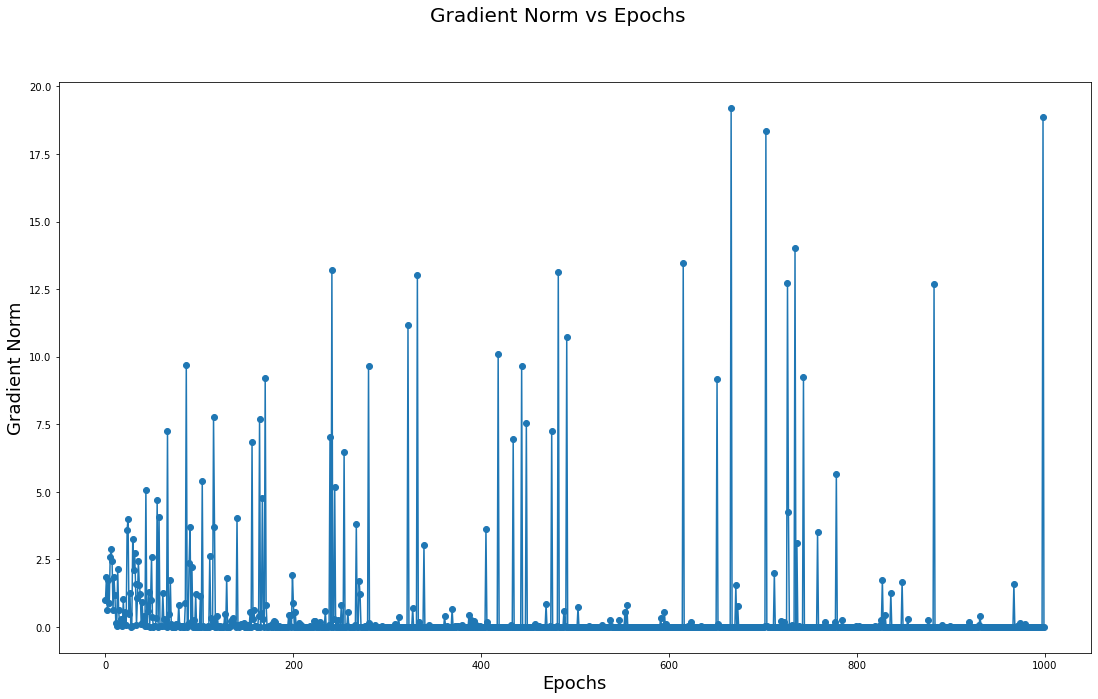

In [14]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradien_vector)
plt.plot(x,gradien_vector)
plt.savefig('Line_plot_gradient norm vs epochs.pdf')

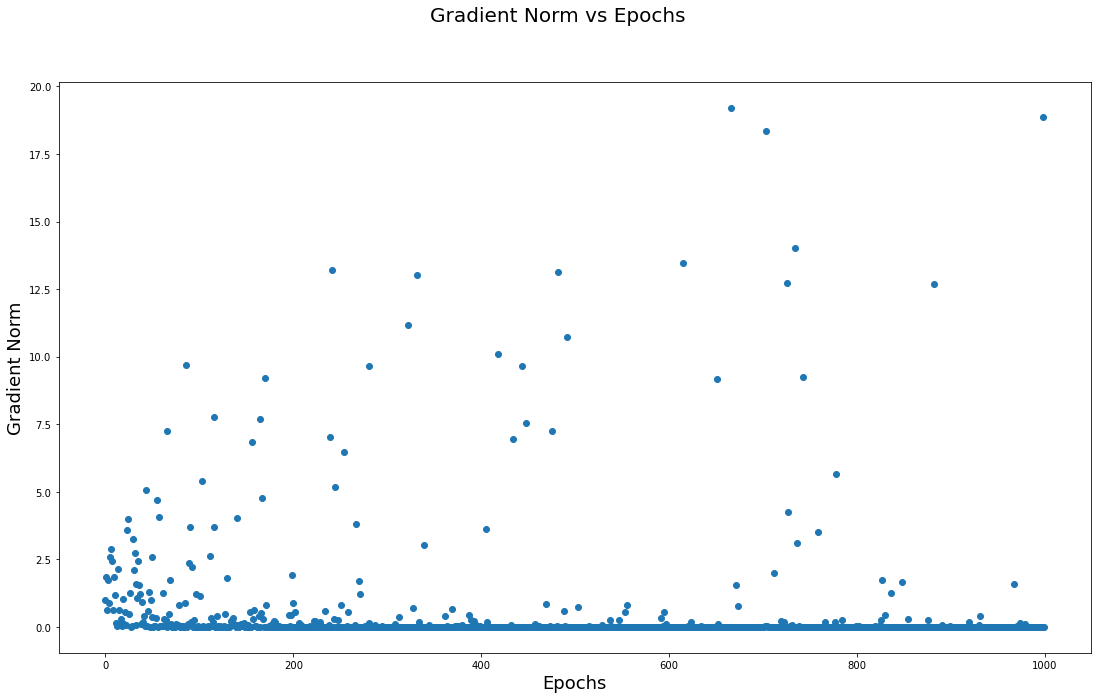

In [11]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradien_vector)
plt.savefig('scatterplot_gradient norm vs epochs.pdf')